In [1]:
%%html
<style>@font-face{font-family:myFont;src:url(v.ttf)}div.text_cell{font-family:myFont;direction:rtl;text-align:center;}</style>

# «به نام خدا»
## هوش مصنوعی 
## تمرین کامپیوتری شماره صفر
## آشنایی با هوش مصنوعی
### امیرحسین دبیری اقدم - 810197502
### استاد: دکتر فدایی
#####  دانشگاه تهران - پاییز 99
***
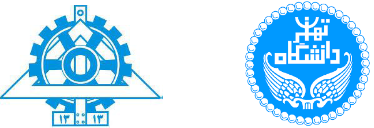


### هدف پروژه : پرکردن نواقص یک دیتاست با پیشبینی آنها به کمک تحلیل آماری
### مقدمه:
   
<div style="text-align:right"><span>در این پروژه یک مجموعه داده (دیتاست) حاوی اطلاعات (شامل کل زمانی که کاربر در سایت سپری کرده، سن کاربر، میزان استفاده روزانه کاربر از اینترنت و...) مربوط به 1000 کاربر یک سایت که یک تبلیغ اینترنتی به آنها نمایش داده شده را در اختیار داریم. یکی از این مشخصه ها " آیا کاربر روی آگهی کلیک کرده یا خیر" است که برای برخی از کاربرها این مشخصه مجهول است و هدف ما در این پروژه پیشبینی این مقدار مجهول با استفاده از تحلیل آماری دیگر مشخصه ها و استفاده از آنها برای تخمین این که آیا کاربر روی آگهی کلیک کرده یا خیر است.</span></div>


#### تسک اول - ساخت دیتافریم و بررسی آن
***

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np

plt.style.use('seaborn') # beautiful plots :O

In [3]:
#Importing Dataset
ad_df = pd.read_csv("advertising_dataset.csv", index_col = 0)

In [4]:
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:18,0.0


<a id="section_head"></a>
<div style="text-align:right"><span>همانطور که از نام دستور مشخص است، "سر" یا سطرهای ابتدای دیتاست را نمایش میدهد.</span></div>

In [5]:
ad_df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Male,Lebanon,2016-02-11 21:49:00,1.0
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Male,Bosnia and Herzegovina,2016-04-22 02:07:01,1.0
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Male,Mongolia,2016-02-01 17:24:57,1.0
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Female,Guatemala,2016-03-24 02:35:54,0.0
999,NaN,26.0,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,Female,Brazil,2016-06-03 21:43:21,1.0


<div style="text-align:right"><span>همانطور که از نام دستور مشخص است، "دم" یا سطرهای انتهایی دیتاست را نمایش میدهد.</span></div>

In [6]:
ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,907.000000,979.000000,1000.000000,913.000000,832.000000
mean,64.794818,36.009193,55000.000080,179.751271,0.496394
std,15.954841,8.783636,13414.634022,43.957934,0.500288
min,32.600000,19.000000,13996.500000,104.780000,0.000000
25%,50.615000,29.000000,47031.802500,138.550000,0.000000
50%,67.940000,35.000000,57012.300000,183.480000,0.000000
75%,78.555000,42.000000,65470.635000,217.850000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000



<div style="text-align:right"><span>این تابع یک توصیف کلی از ویژگی های آماری (میانگین، انحراف معیار، میانه، مینیمم، ماکسیمم و ...) ستون های دیتاست به ما میدهد تا یک دید کلی نسبت به دیتاست مورد بررسی پیدا کنیم.</span></div>


#### تسک دوم - برچسب گذاری داده های غیر عددی
***

In [7]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  907 non-null    float64
 1   Age                       979 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      913 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Gender                    1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             832 non-null    float64
dtypes: float64(5), object(5)
memory usage: 85.9+ KB


<div style="text-align:right"><span>
ستون Dtype نشان دهنده نوع هرکدام از داده ها در دیتاست است، که داده های کمی از نوع float64 و داده های کیفی یا categorical از نوع object نشان داده شده اند. همچنین این دیتاست حدود 85 کیلوبایت از حافظه را اشغال کرده است.<br>
حال برای لیبل گذاری ستون Gender ابتدا آنرا به نوع categorical تبدیل میکنیم و بعد آنهارا به صورت <br>
 "1 :Male" و"0 :Female" لیبل گذاری میکنیم:
</span></div>


In [8]:
#converting to categorical
ad_df["Gender"] = ad_df["Gender"].astype('category')
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  907 non-null    float64 
 1   Age                       979 non-null    float64 
 2   Area Income               1000 non-null   float64 
 3   Daily Internet Usage      913 non-null    float64 
 4   Ad Topic Line             1000 non-null   object  
 5   City                      1000 non-null   object  
 6   Gender                    1000 non-null   category
 7   Country                   1000 non-null   object  
 8   Timestamp                 1000 non-null   object  
 9   Clicked on Ad             832 non-null    float64 
dtypes: category(1), float64(5), object(4)
memory usage: 79.2+ KB


In [9]:
#label encoding
if (ad_df["Gender"].dtype != 'int8'):
# note that we should check to run this code just once,cause after the first run the gender columns is converted to int 
# and therefore it is not a categorical data and it does'nt need label encoding!
    d = dict(enumerate(ad_df["Gender"].cat.categories))
    ad_df["Gender"] = ad_df["Gender"].cat.codes 

print(d)
ad_df.head()

{0: 'Female', 1: 'Male'}


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,NaN,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


<a id="section_head2"></a>
<div style="text-align:right"><span>
همانطور که انتظار داشتیم مقادیر ستون Gender با اعداد متناظر برای مرد و زن جایگزین شده اند. (مثلا <a href="#section_head"> سطر صفر اطلاعات مربوط به یک کاربر زن است </a>
که در اینجا هم با 0 در ستون Gender این موضوع مشخص شده است)
</span></div>


#### تسک سوم - هندل کردن داده های گم شده
***

In [10]:
ad_df.isna().sum()

Daily Time Spent on Site     93
Age                          21
Area Income                   0
Daily Internet Usage         87
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64

<div style="text-align:right"><span>
با استفاده از دستور isna میتوان برای هر ستون، سطرهایی که مقدار آن ستون برای آنها خالی(NaN) است را پیدا کرد و با دستور sum تعداد آنهارا بدست آورد که مشاهده میشود ستونهایی که سطر گم شده دارند همه از نوع کمی بوده و میتوان داده های گم شده را با میانگین آن ستون تکمیل کرد.
</span></div>



In [11]:
temp_clicked_column = ad_df["Clicked on Ad"] # to undo changes made by next line on this column
ad_df = ad_df.fillna(ad_df.mean())
ad_df["Clicked on Ad"] = temp_clicked_column
print(ad_df.isna().sum())
ad_df.head()

Daily Time Spent on Site      0
Age                           0
Area Income                   0
Daily Internet Usage          0
Ad Topic Line                 0
City                          0
Gender                        0
Country                       0
Timestamp                     0
Clicked on Ad               168
dtype: int64


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.090000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0.0
1,80.23,31.0,68441.85,179.751271,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0.0
2,69.47,26.0,59785.94,236.500000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0.0
3,74.15,29.0,54806.18,245.890000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0.0
4,68.37,35.0,73889.99,225.580000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0.0


<div style="text-align:right"><span>
حال تنها ستون هدف (Clicked On Ad) دارای سطر خالی است و میبینیم که برای مثال  
<a href="#section_head2">در سطر 1 ، ستون Daily Internet Usage به صورت NaN بود</a>
 که حالا با مقدار میانگین آن ستون جایگزین شده است.
</span></div>


<div style="text-align:right"><span>
بسته به ویژگیهای دیتاستهای مختلف روش های دیگری نیز برای هندل کردن داده های گم شده وجود دارد از جمله حذف سطر هایی است که دارای نقص هستند؛ این روش وقتی کاربرد دارد که تعداد سطرهای دارای داده گم شده کم باشد (به نسبت اندازه دیتاست) و حذف آنها تاثیر زیادی بر دیتاست نگذارد یا مثلا وقتی پر کردن سطرهای گم شده از نظر آماری به داده ها لطمه وارد کند و یا باعث ایجاد بایاس شود استفاده از این روش مناسبتر است .<br>
همچنین یک نکته که گفتن آن خالی از لطف نیست این است که علاوه بر پرکردن سطر گم شده با میانگین روش های دیگری نیز وجود دارد مثلا پر کردن همه مقادیر گم شده با یک عدد ثابت و یا استفاده از روشهای گوناگون درون یابی(خطی، درجه 2 و ...) میتواند مفید باشد برای رسیدن به یک دیتاست قابل استفاده.
</span></div>


#### تسک چهارم - استخراج داده 1
***

In [12]:
gender_counts = ad_df["Gender"].value_counts()
print("Male count: %d , Female count: %d" %(gender_counts[1], gender_counts[0]))

Male count: 481 , Female count: 519


In [13]:
click_counts = ad_df["Clicked on Ad"].value_counts()
print("Clicked count: %d , Not Clicked count: %d" %(click_counts[1], click_counts[0]))

Clicked count: 413 , Not Clicked count: 419


#### تسک پنج - استخراج داده 2
***

In [14]:
condt = (ad_df["Age"] > 20) & (ad_df["Gender"] == 1)
print("# of Male users older than 20 : %d" %(len(ad_df[condt])))

# of Male users older than 20 : 472


#### تسک ششم - استخراج داده 3
***

In [15]:
ad_df.groupby("Clicked on Ad")["Age"].mean()

Clicked on Ad
0.0    31.723326
1.0    40.295600
Name: Age, dtype: float64

<div style="text-align:right"><span>
با استفاده از دستور groupby دیتاست را بر اساس ستون Clicked On Ad گروه بندی کرده و میانگین سن هر گروه را بدست می آوریم.
</span></div>


#### تسک هفتم - مقایسه سرعت حلقه و vectorization
***

In [16]:
%timeit -n 1 -r 100 temp = ad_df.groupby("Clicked on Ad")["Age"].mean()

686 µs ± 202 µs per loop (mean ± std. dev. of 100 runs, 1 loop each)


In [17]:
%%timeit -n 1 -r 100
clicked_sum_loop = 0 
not_clicked_sum_loop = 0

for index, row in ad_df.iterrows():
    if (row["Clicked on Ad"]):
        clicked_sum_loop += row["Age"]
    else:
        not_clicked_sum_loop += row["Age"]

clicked_mean_loop = clicked_sum_loop / click_counts[1]
not_clicked_mean_loop = not_clicked_sum_loop / click_counts[0]

75 ms ± 4.06 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<div style="text-align:right"><span>
با مقایسه زمان میانگین که از اجرای قطعه کد های بالا بدست می آید میتوان گفت استفاده از vectorization باعث میشود عملیات مورد نظر ما تا حدود 100 برابر سریعتر انجام گیرد که در مورد دیتاست های بزرگ این موضوع بيشتر به چشم می آيد و بسیار حائز اهمیت است که حتما از vectorization استفاده شود.
</span></div>


#### تسک هشتم - هیستوگرام
***

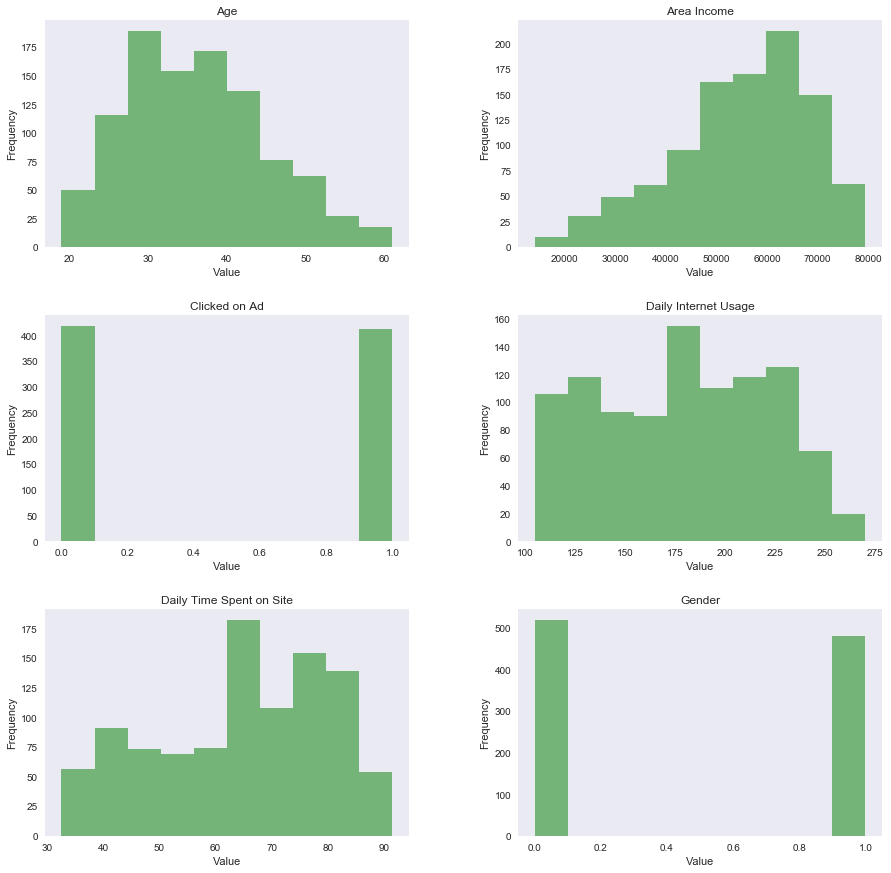

In [18]:
axes = ad_df.hist(grid=False, figsize=(15, 15), color='g', alpha = 0.5)
for ax in axes.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

<div style="text-align:right"><span>
    مشاهده میشود که شکل توزیع داده های عددی تا حدی شبیه <b>توزیع نرمال </b>  است.
</span></div>


#### تسک جانبی - حذف ستونهای غیر عددی

In [19]:
minified_ad_df = ad_df.select_dtypes(['number'])
minified_ad_df = minified_ad_df.drop("Gender", axis = 1)
print(minified_ad_df.info())
minified_ad_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Clicked on Ad             832 non-null    float64
dtypes: float64(5)
memory usage: 46.9 KB
None


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35.0,61833.90,256.090000,0.0
1,80.23,31.0,68441.85,179.751271,0.0
2,69.47,26.0,59785.94,236.500000,0.0
3,74.15,29.0,54806.18,245.890000,0.0
4,68.37,35.0,73889.99,225.580000,0.0


<div style="text-align:right"><span>
ستونهای غیرعددی را حذف کرده و در ادامه از یک دیتاست کوچکتر که فقط شامل ستونهایی عددی و البته ستون هدف است استفاده خواهیم کرد.
</span></div>


#### تسک نهم - نرمالسازی دادهها
***

In [20]:
#Normalization
normalized_ad_df = (minified_ad_df - minified_ad_df.mean()) / minified_ad_df.std()
normalized_ad_df["Clicked on Ad"] = minified_ad_df["Clicked on Ad"] # to undo changes in "Clicked on Ad" due to normalization
normalized_ad_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,832.000000
mean,-4.119816e-15,-1.420419e-15,-2.035927e-15,-1.409185e-15,0.496394
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500288
min,-2.118908e+00,-1.957144e+00,-3.056625e+00,-1.785019e+00,0.000000
25%,-7.891122e-01,-8.065049e-01,-5.939929e-01,-9.032985e-01,0.000000
50%,5.430951e-02,-1.161217e-01,1.500078e-01,0.000000e+00,0.000000
75%,8.432692e-01,6.893254e-01,7.805382e-01,8.247266e-01,1.000000
max,1.753000e+00,2.875539e+00,1.825231e+00,2.147814e+00,1.000000



<div style="text-align:right"><span>
مشاهده میشود که میانگین دیتاها برابر با صفر و انحراف معیار آنها برابر با یک است که همان نتیجه مورد انتظار ما است.  (خطای ناچیز به دلیل خطا در محاسبات و گرد کردن بوجود آمده است.)
</span></div>
    

#### تسک دهم - رسم تابع چگالی احتمال  برای دو حالت کلیک کرده/نکرده 
***

In [21]:
clicked_df = normalized_ad_df[normalized_ad_df["Clicked on Ad"] == 1]
clicked_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
7,0.079319,1.379709,-2.266679,-1.142642,1.0
12,0.000000,1.379709,-0.250702,-1.586449,1.0
16,-0.618980,0.114006,-2.315616,-1.198594,1.0
18,-0.664392,-0.001058,-1.782565,-1.460974,1.0
19,0.644014,0.459198,-2.324199,-1.053357,1.0
...,...,...,...,...,...
994,-1.388360,-0.921569,0.605828,-0.160505,1.0
995,0.538051,-0.691441,1.221395,0.686394,1.0
996,-0.888164,1.034517,0.952853,-1.079309,1.0
997,-0.866445,1.724900,-0.938101,-1.413831,1.0


In [22]:
not_clicked_df = normalized_ad_df[normalized_ad_df["Clicked on Ad"] == 0]
not_clicked_df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,0.273474,-0.116122,0.509436,1.817578,0.0
1,1.015870,-0.576377,1.002029,0.000000,0.0
2,0.307698,-1.151696,0.356770,1.351152,0.0
3,0.615713,-0.806505,-0.014448,1.574722,0.0
4,0.235301,-0.116122,1.408163,1.091154,0.0
...,...,...,...,...,...
986,0.000000,-0.921569,0.370281,1.260200,0.0
988,1.639798,1.379709,-0.260806,0.586871,0.0
989,0.405763,-0.576377,0.014003,1.824959,0.0
993,-0.039148,-1.036633,0.834981,1.139963,0.0


<div style="text-align:right"><span>
دیتافریم بدست آمده از بخش قبل را بر اساس مقدار ستون Clicked On Ad به دو دیتا فریم کوچکتر افراز كرديم و سپس میانگین و انحراف معیار هر ستون از دیتافریم های کوچکتر را محاسبه میکنیم.<br>
سپس با استفاده از کتابخانه  scipy.stats  تابع چگالی احتمال توزیع نرمال ویژگی مربوطه با میانگین و انحراف معیار محاسبه شده، رسم میکنیم.
</span></div>


In [23]:
clicked_means = clicked_df.mean()
clicked_stds = clicked_df.std()

not_clicked_means = not_clicked_df.mean()
not_clicked_stds = not_clicked_df.std()

print("Mean values:\n\n",clicked_means,"\n\n",not_clicked_means)
print("\n\nStd Dev values:\n\n",clicked_stds,"\n\n",not_clicked_stds)

Mean values:

 Daily Time Spent on Site   -0.691783
Age                         0.493211
Area Income                -0.498632
Daily Internet Usage       -0.753395
Clicked on Ad               1.000000
dtype: float64 

 Daily Time Spent on Site    0.714104
Age                        -0.493148
Area Income                 0.476367
Daily Internet Usage        0.764216
Clicked on Ad               0.000000
dtype: float64


Std Dev values:

 Daily Time Spent on Site    0.836161
Age                         1.019268
Area Income                 1.046199
Daily Internet Usage        0.723959
Clicked on Ad               0.000000
dtype: float64 

 Daily Time Spent on Site    0.531369
Age                         0.706315
Area Income                 0.670476
Daily Internet Usage        0.592058
Clicked on Ad               0.000000
dtype: float64


In [24]:
def plot_pdf(x, mu, sigma, lbl, new_fig):
# helper function to plot normal PDF
    if (new_fig): plt.figure()
    y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, Label = lbl)
    plt.xlabel("x - random variable")
    plt.ylabel("pdf(x) [probability density function]")
    plt.legend()

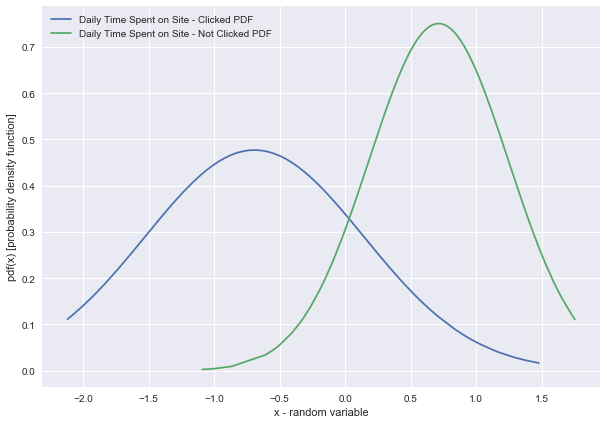

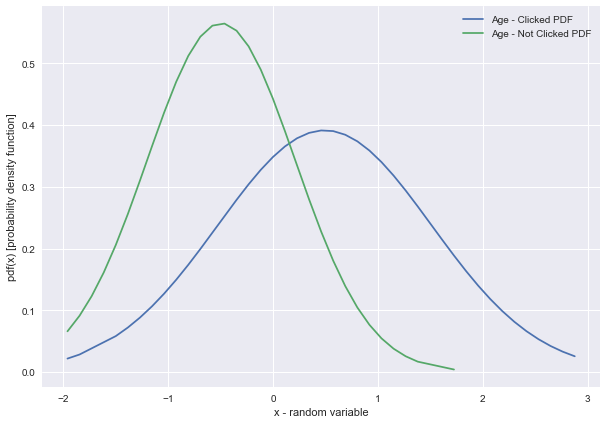

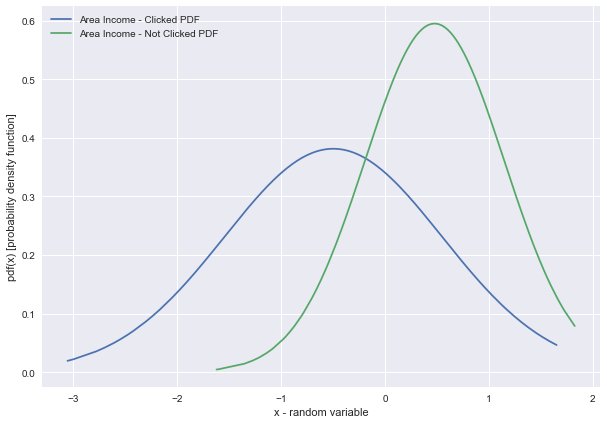

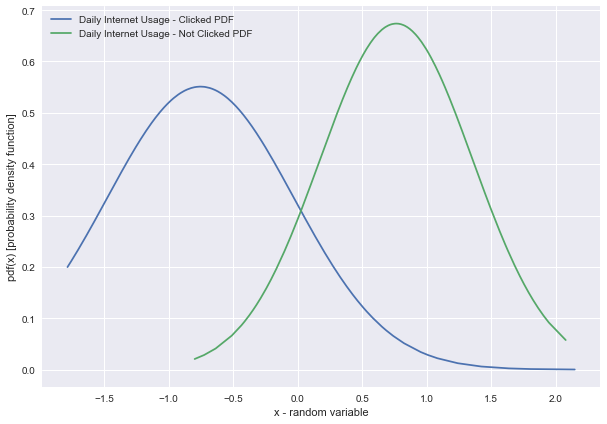

In [25]:
plt.rcParams['figure.figsize'] = (10, 7)
for col in clicked_df.columns:
    if (col != "Clicked on Ad"):
         plot_pdf(clicked_df[col].sort_values(), clicked_means[col], (clicked_stds[col]), col + " - Clicked PDF", True)
         plot_pdf(not_clicked_df[col].sort_values(), not_clicked_means[col], (not_clicked_stds[col]), col + " - Not Clicked PDF", False)

<div style="text-align:right"><span>
با توجه به اینکه ما با توجه به تابع چگالی احتمال میخواهیم مقادیر مجهول ستون هدف را پیش بینی کنیم پس باید تابع چگالی احتمال دو حالت کلیک کرده/نکرده ویژگی انتخابی ما تا حد ممکن از هم جدا باشند تا از روی مقدار این ویژگی بتوان یک بازه اطمینان مناسب بدست آورد و پیش بینی درستی انجام داد؛ در نگاه اول از میان نمودار های بالا دو ویژگی Daily Time Spent on Site و Daily Internet Usage به نظر میرسد که دارای این ویژگی هستند.<br>
برای انتخاب بین این دو ویژگی فاصله مراکز تابع چگالی احتمال دو حالت کلیک کرده/نکرده را برای هردو ویژگی حساب میکنیم:
</span></div>


ِDistance : 1.405887
ِDistance : 1.517612


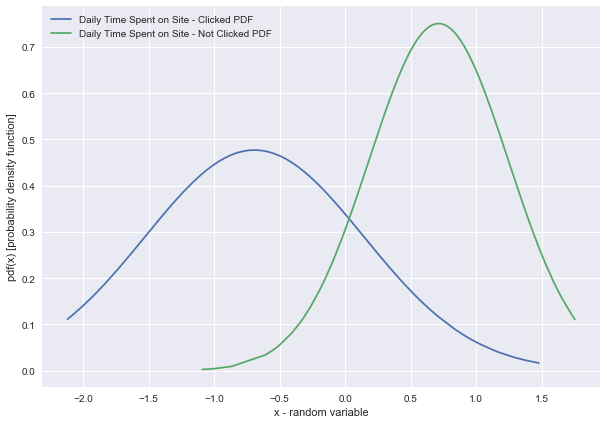

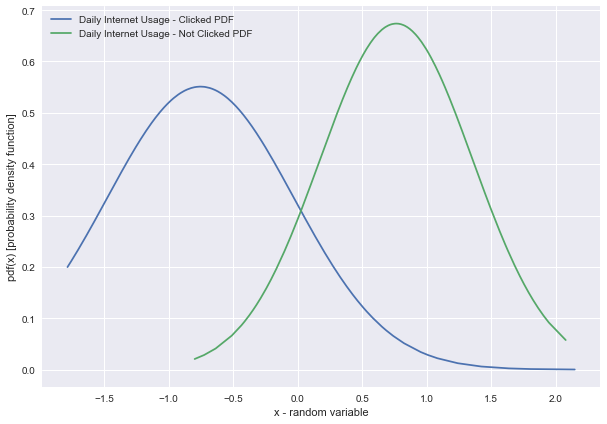

In [26]:
mu_clicked = clicked_means["Daily Time Spent on Site"]
mu_not_clicked = not_clicked_means["Daily Time Spent on Site"]
print("ِDistance : %f" %(abs(mu_clicked - mu_not_clicked)))

mu_clicked = clicked_means["Daily Internet Usage"]
mu_not_clicked = not_clicked_means["Daily Internet Usage"]
print("ِDistance : %f" %(abs(mu_clicked - mu_not_clicked)))

for col in ["Daily Time Spent on Site", "Daily Internet Usage"]:
    if (col != "Clicked on Ad"):
         plot_pdf(clicked_df[col].sort_values(), clicked_means[col], (clicked_stds[col]), col + " - Clicked PDF", True)
         clicked_df[col].sort_values().to_csv("x_clicked.csv")
         plot_pdf(not_clicked_df[col].sort_values(), not_clicked_means[col], (not_clicked_stds[col]), col + " - Not Clicked PDF", False)
         not_clicked_df[col].sort_values().to_csv("x_not_clicked.csv")


<div style="text-align:right"><span>
با توجه به اینکه نمودار تابع چگالی احتمال برای ویژگی <b>Daily Internet Usage</b> از هم فاصله بیشتری دارند پس گزینه بهتری برای ورودی مدل برای پیش بینی خواهد بود.
</span></div>


#### تسک یازدهم - پیشبینی نهایی!
***

<div style="text-align:right"><span>
برای پیشبینی سطرهای مجهول باید بازه اطمینان در هر دو حالت کلیک کرده/نکرده برای مقدار Daily Internet Usage بدست آوریم تا بتوانیم با توجه به مقدار Daily Internet Usage در مورد سطرهای مجهول اظهار نظر کنیم؛ در مورد توزیع نرمال می توان گفت تقریبا اکثر داده ها در بازه متقارن”2*سیگما + مو” و”2*سیگما - مو” قرار دارند؛ در این پروژه به دلیل نزدیک بودن نمودارهای تابع چگالی احتمال دو حالت کلیک کرده/نکرده، بازه های گفته شده دارای اشتراک است به همین دلیل با کمی آزمون و خطا  بزرگترین بازه بدون اشتراک برای این دو نمودار به صورت “1.15*سیگما + مو” و”1.15*سیگما - مو” بدست آمد (که میتواند به صورت خودكار هم تعیین شود ولی در اینجا به دلیل ثابت بودن دیتاست ورودی به صورت دستی مقدار مورد نظر را یافته ایم) که مقدار عددی آن در خروجی کد زیر دیده میشود؛ با محاسبه سطح زیر نمودار تابع چگالی ها در بازه گفته شده به مقدار 0.75 میرسیم که این بدان معناست که 75 درصد داده های مربوط به هر حالت(کلیک کرده/نکرده) در بازه گفته شده برای هرکدام قرار دارد که بازه اطمینان مناسبی به نظر میرسد و داده های خارج این بازه ها به احتمال زیاد به آن کلاس مربوط نیستند. و بدین ترتیب میتوان مقدار سطرهای مجهول را تخمین زد. <br>
<br> (البته در مورد داده هایی که سمت راست نقطه”1.15*سیگما + مو” قرار میگیرند با اینکه در خارج بازه اطمینان هردو کلاس است و هرگونه اظهار نظری دقت پایینی خواهد داشت اما برای اینکه سطری خالی نماند به نظر میرسد اگر این داده هارا جز کلاس کلیک نکرده در نظر بگیریم بهتر است و به طور مشابه در مورد داده هایی که سمت چپ نقطه”1.15*سیگما - مو" قرار دارد آنها را جز کلاس کلیک کرده در نظر میگیریم تا همه بازه های ممکن پوشش داده شوند.)
</span></div>


In [27]:
best_col = "Daily Internet Usage"

mu_clicked = clicked_means[best_col]
sigma_clicked = clicked_stds[best_col]
mu_not_clicked = not_clicked_means[best_col]
sigma_not_clicked = not_clicked_stds[best_col]
coef = 1.15
print("Clicked Confidence range: (mu - 1.15*sigma,mu + 1.15*sigma) = (%f,%f)" %(mu_clicked - coef*sigma_clicked, mu_clicked + coef*sigma_clicked))
print("Not Clicked Confidence range: (mu - 1.15*sigma,mu + 1.15*sigma) = (%f,%f)" %(mu_not_clicked - coef*sigma_not_clicked,  mu_not_clicked + coef*sigma_not_clicked))

nan_df = normalized_ad_df[normalized_ad_df["Clicked on Ad"].isna()]
result = pd.Series([], dtype = "float64") #empty pandas series to save the final result of prediction

for index in nan_df.index:
    value = nan_df[best_col][index]
    if (mu_clicked - coef*sigma_clicked <= value <= mu_clicked + coef*sigma_clicked): #clicked Confidence range
        result[index] = 1
    elif (mu_not_clicked - coef*sigma_not_clicked <= value <= mu_not_clicked + coef*sigma_not_clicked): #not clicked Confidence range
        result[index] = 0
    elif (value < mu_clicked - coef*sigma_clicked): # not in Confidence range but it's better than nothing :)
        result[index] = 1
    elif (mu_not_clicked + coef*sigma_not_clicked < value): # not in Confidence range but it's better than nothing :)
        result[index] = 0
    else:
        print(value, " not in range!")
        
#Saving the predicted results
result.to_frame("Clicked on Ad").to_csv("result.csv")

Clicked Confidence range: (mu - 1.15*sigma,mu + 1.15*sigma) = (-1.585948,0.079157)
Not Clicked Confidence range: (mu - 1.15*sigma,mu + 1.15*sigma) = (0.083350,1.445083)


<div style="text-align:right"><span> در پایان نتیجه نهایی بدست آمده برای هر سطر مجهول به همراه اندیس آن در فایل <b>result.csv</b> (در کنار فایل نوت بوك) ذخیره میکنیم.
</span></div>
